# Video games sales analysis


## Project description and general information

The goal of this project is to support decision making for online store Ice, which sells video games all over the world. Company wants to identify patterns that determine whether a game succeeds or not. Based on historical data on game sales are available from open sources,  user and expert reviews, genres and platforms (e.g. Xbox or PlayStation).
Project goals and tasks: 
 - data assesment
 - probability computations, hypothesis testing on the data using Pandas, Numpy, and the statsmodels module in Python
 - made recommendations to plan advertising campaigns
 - spot potential big winners


In [1]:
!pip install -Uq sidetable --user
!pip install -Uq seaborn --user

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from scipy import stats as st
import sidetable
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('games.csv')

In [4]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [7]:
df['Name'].value_counts()

Need for Speed: Most Wanted                          12
LEGO Marvel Super Heroes                              9
FIFA 14                                               9
Madden NFL 07                                         9
Ratatouille                                           9
                                                     ..
Hermie Hopperhead: Scrap Panic                        1
The House of the Dead 2                               1
The Sims 3: Barnacle Bay                              1
Golden Nugget Casino / Texas Hold 'Em Double Pack     1
Big Air                                               1
Name: Name, Length: 11559, dtype: int64

In [8]:
print(len(df))

16715


Same name = same game but on different platform and/or different year.

Data concists of 11 columns and 16715 rows. 6 columns have missing values. 

## Prepare the data


* 		Replace the column names (make them lowercase). (done)
* 		Convert the data to the required types. (done)
* 		Describe the columns where the data types have been changed and why. (50/50)
* 		If necessary, decide how to deal with missing values:
    * 		Explain why you filled in the missing values as you did or why you decided to leave them blank.
    * 		Why do you think the values are missing? Give possible reasons.
    * 		Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
* 		Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.


In [9]:
df.columns= df.columns.str.lower()

In [10]:
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [11]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [12]:
df_year  = df.pivot_table(index='platform', values='year_of_release', aggfunc='median')

In [13]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [14]:
df['year_of_release']=df['year_of_release'].fillna(-1)

In [15]:
df['year_of_release'].describe()

count    16715.000000
mean      1974.177505
std        252.685735
min         -1.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [16]:
df['year_of_release'] = df['year_of_release'].astype('int')

In [17]:
df['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000,   -1, 1995,
       1991, 1981, 1987, 1980, 1983])

Column 'year_of_release' - missing values filled with median year per platform. Data type converted to int.

In [18]:
df.dropna(how='all', subset=['name', 'genre'], inplace=True)

Two missing values in column name is not possible to identify, as half of other columns are also empty, so will remove them.

We have a lot of missing values in Ratings - critic_score, user_score, rating. Most of the positions also has empty fields in users and experts scores. Plus low number or 0.0 in sales fields. Probably, ratings for games with low sales values weren't defined.

In [19]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [20]:
df['critic_score'] = df['critic_score'].fillna(-1)

In [21]:
df['critic_score'].describe()

count    16713.000000
mean        33.064920
std         36.299815
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         70.000000
max         98.000000
Name: critic_score, dtype: float64

In [22]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [23]:
df['user_score'] = df['user_score'].replace("tbd",'NaN')

In [24]:
df['user_score'] = df['user_score'].replace('nan','NaN')

In [25]:
df['user_score'] = df['user_score'].astype('float')

In [26]:
df['user_score'] = df['user_score'].fillna(-1)

In [27]:
df['user_score'].describe()

count    16713.000000
mean         2.689888
std          4.169887
min         -1.000000
25%         -1.000000
50%         -1.000000
75%          7.300000
max          9.700000
Name: user_score, dtype: float64

In [28]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [29]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,NaN,0.01


In [30]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [31]:
df['rating'].fillna(value = 'No_',inplace = True)

In [32]:
df['rating'].unique()

array(['E', 'No_', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB


## Conclusion

Two positions with missed name and genre removed. Year filled with connection to platform and converted to integrer. Missing rows in score columns filled with medians. In 'user_score', 'tbd' also replaced with 'nan' to replace them both with median, as for project seems no difference between empty field or 'to be determine', and converted to float. 'NaN' in Rating replaced with 'No_' = 'not rated' to fill empty rows.

## Analyze the data


* 		Look at how many games were released in different years. Is the data for every period significant?
* 		Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?
* 		Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.
* 		Work only with the data that you've decided is relevant. Disregard the data for previous years.
* 		Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.
* 		Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.
* 		Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
* 		Keeping your conclusions in mind, compare the sales of the same games on other platforms.
* 		Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?


### Look at how many games were released in different years. Is the data for every period significant?  pivot by year

In [34]:
dfy = df.query('year_of_release >= 0')

In [35]:
dfy['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

In [36]:
df_y=dfy[['year_of_release','name']].groupby(['year_of_release']).count().sort_values(by='year_of_release').reset_index()

In [37]:
df_y

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


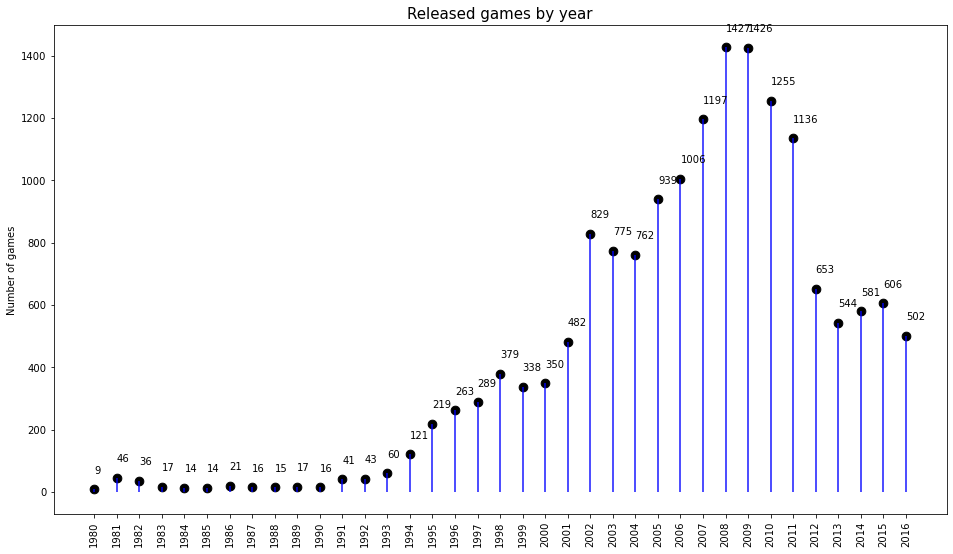

In [38]:
fig,ax=plt.subplots(figsize=(16,9))
ax.vlines(x=df_y.year_of_release, ymin=0, ymax=df_y.name, color='blue', alpha=0.69, linewidth=2)
ax.scatter(x=df_y.year_of_release, y=df_y.name, s=75, color='black', alpha=1)

ax.set_title('Released games by year', fontdict={'size':15})
ax.set_ylabel('Number of games')
ax.set_xticks(df_y.year_of_release)
ax.set_xticklabels(df_y.year_of_release, rotation=90)

for row in df_y.itertuples():
    ax.text(row.year_of_release, row.name+50, s=round(row.name,2))
    
plt.show()

The number of games released per year was growing up to 2009, slowly decreased in 2010-2011. In 2012 was released almost twice less. Than number stayed stable around 550-650 games per year.
Data for  period before 1993 is not significant, less than 50 games per year.

### Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade? 

In [39]:
df_p=df[['platform','total_sales']].groupby(['platform']).sum().sort_values(by='total_sales').reset_index()


In [40]:
df_p.tail(5)

,platform,total_sales
26,DS,806.12
27,Wii,907.51
28,PS3,939.65
29,X360,971.42
30,PS2,1255.77


These are 5 platforms with highest total sales. PS2	has the biggest number - 1255.77

In [41]:
df_p['sales_z'] = (df_p['total_sales']-df_p['total_sales'].mean())/df_p['total_sales'].std()

In [42]:
df_p['log_base'] = np.log2(df_p['total_sales'])

In [43]:
df_p

,platform,total_sales,sales_z,log_base
0,PCFX,0.03,-0.825614,-5.058894
1,GG,0.04,-0.825586,-4.643856
2,3DO,0.10,-0.825413,-3.321928
3,TG16,0.16,-0.825241,-2.643856
4,WS,1.42,-0.821623,0.505891
5,NG,1.44,-0.821565,0.526069
6,SCD,1.86,-0.820359,0.895303
7,DC,15.95,-0.779896,3.995485
8,GEN,28.35,-0.744287,4.825277
9,SAT,33.59,-0.729239,5.069960


In [44]:
df_p['color']=['red' if x<0 else 'green' for x in df_p['sales_z']]
df_p

,platform,total_sales,sales_z,log_base,color
0,PCFX,0.03,-0.825614,-5.058894,red
1,GG,0.04,-0.825586,-4.643856,red
2,3DO,0.10,-0.825413,-3.321928,red
3,TG16,0.16,-0.825241,-2.643856,red
4,WS,1.42,-0.821623,0.505891,red
5,NG,1.44,-0.821565,0.526069,red
6,SCD,1.86,-0.820359,0.895303,red
7,DC,15.95,-0.779896,3.995485,red
8,GEN,28.35,-0.744287,4.825277,red
9,SAT,33.59,-0.729239,5.069960,red


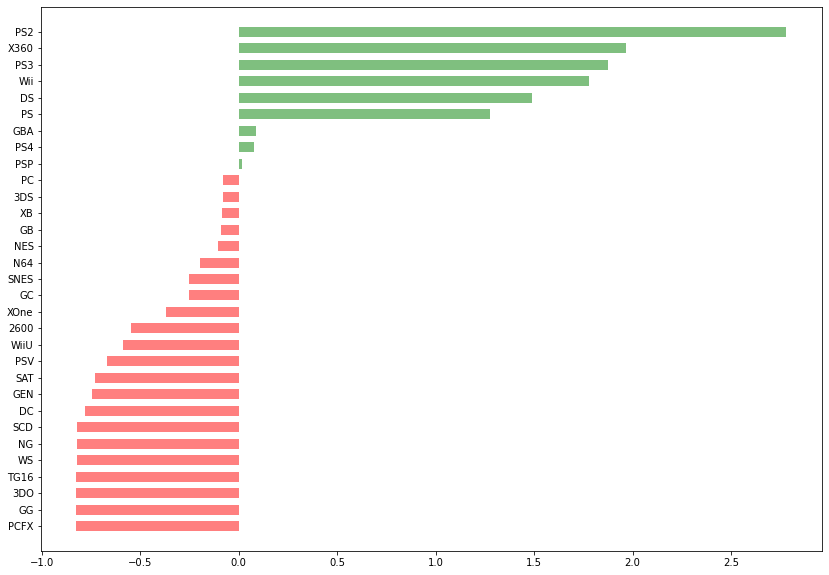

In [45]:
plt.figure(figsize=(14,10))
plt.hlines(y=df_p.platform,xmax=df_p.sales_z, xmin=0,color=df_p.color, alpha=0.5, linewidth=10)
plt.show()

In [46]:
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,No_,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,No_,31.38


In [47]:
df_p_pivot = dfy.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
df_p_5 = df_p_pivot.query('platform == ("DS", "Wii", "PS3", "X360", "PS2")')

In [48]:
df_p_5

total_sales
platform year_of_release             
DS       1985                    0.02
         2004                   17.27
         2005                  130.14
         2006                  119.81
         2007                  146.94
         2008                  145.31
         2009                  119.54
         2010                   85.02
         2011                   26.18
         2012                   11.01
         2013                    1.54
PS2      2000                   39.17
         2001                  166.43
         2002                  205.38
         2003                  184.31
         2004                  211.81
         2005                  160.66
         2006                  103.42
         2007                   75.99
         2008                   53.90
         2009                   26.40
         2010                    5.64
         2011                    0.45
PS3      2006                   20.96
         2007                   73.19
         2008                  118.52
         2009                  130.93
         2010                  142.17
         2011                  156.78
         2012                  107.36
         2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60
Wii      2006                  137.15
         2007                  152.77
         2008                  171.32
         2009                  206.97
         2010                  127.95
         2011                   59.65
         2012                   21.71
         2013                    8.59
         2014                    3.75
         2015                    1.14
         2016                    0.18
X360     2005                    8.25
         2006                   51.62
         2007                   95.41
         2008                  135.26
         2009                  120.29
         2010                  170.03
         2011                  143.84
         2012                   99.74
         2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52

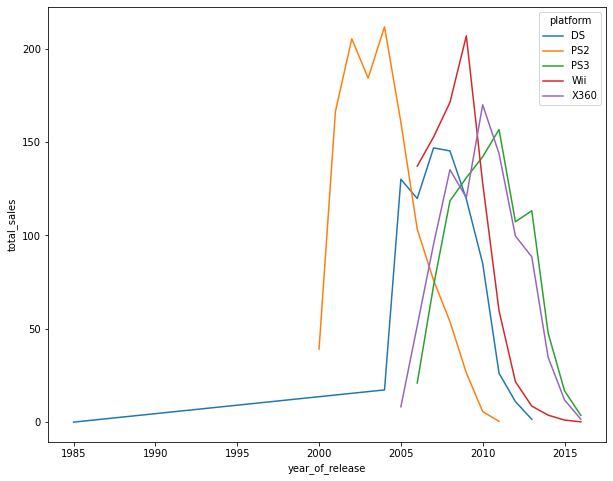

In [49]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df_p_5, x="year_of_release", y="total_sales", hue="platform")
plt.show()

Platforms "DS", "Wii", "PS3", "X360", "PS2" have the greatest total sales. Distribution shows that "Wii" used to have highest sales - 223.3 in 2009, but now have almost zero sales - 0.18. According to data, life cicle of the platform usually around 11-12 years, with peak "seasons" around 5 years. Good years can start in the biggining or in the middle. But not in the last 4 years, which is time for old ones to fade.

According to the info from previous point, to make a prognosis for 2017, we should take data for the platforms which could be profitable in 2017. So as the peak season of the platform is 5 years, we can take last 4 to see if the sales a growing or decreasing.

In [50]:
df_new=df[df.year_of_release>=2013]
df_new

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,No_,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,No_,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,No_,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,No_,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,No_,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,No_,0.01


In [51]:
df_new = df_new.query('platform == ["Wii", "X360", "PS3", "PSV", "WiiU", "PC", "3DS", "XOne", "PS4"]')

In [52]:
df_2016 = df.query('year_of_release == 2016')

In [53]:
df_2016_ts = df_2016[['platform','total_sales']].groupby(['platform']).sum().sort_values(by='total_sales').reset_index()

In [54]:
df_2016_ts

,platform,total_sales
0,Wii,0.18
1,X360,1.52
2,PS3,3.60
3,PSV,4.25
4,WiiU,4.60
5,PC,5.25
6,3DS,15.14
7,XOne,26.15
8,PS4,69.25


In [55]:
df_2016_ts['platform'].unique()

array(['Wii', 'X360', 'PS3', 'PSV', 'WiiU', 'PC', '3DS', 'XOne', 'PS4'],
      dtype=object)

#### Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms

In [56]:
df_new2 = df_new.query('platform != ["DS", "PSP", "PC", "X360"]')

In [57]:
df_plt=pd.pivot_table(df_new2,index='year_of_release',columns='platform',values='total_sales',aggfunc='sum',fill_value=0)
df_plt

platform,3DS,PS3,PS4,PSV,Wii,WiiU,XOne
year_of_release,,,,,,,
2013,56.57,113.25,25.99,10.59,8.59,21.65,18.96
2014,43.76,47.76,100.00,11.90,3.75,22.03,54.07
2015,27.78,16.82,118.90,6.25,1.14,16.35,60.14
2016,15.14,3.60,69.25,4.25,0.18,4.60,26.15


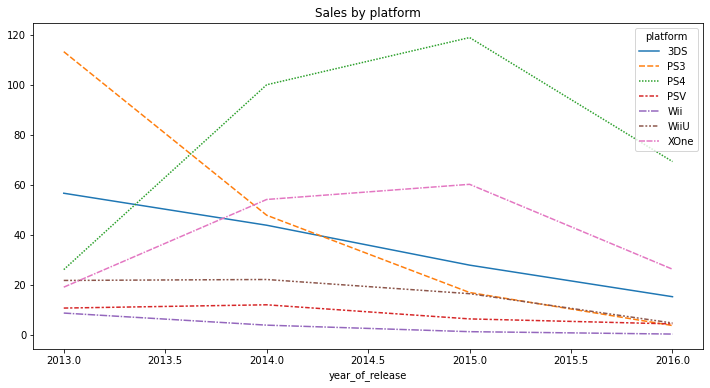

In [58]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_plt)
plt.title('Sales by platform')
plt.show()

In [59]:
dynamics=(df_plt-df_plt.shift(+1)).T
dynamics

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,NaN,-12.81,-15.98,-12.64
PS3,NaN,-65.49,-30.94,-13.22
PS4,NaN,74.01,18.90,-49.65
PSV,NaN,1.31,-5.65,-2.00
Wii,NaN,-4.84,-2.61,-0.96
WiiU,NaN,0.38,-5.68,-11.75
XOne,NaN,35.11,6.07,-33.99


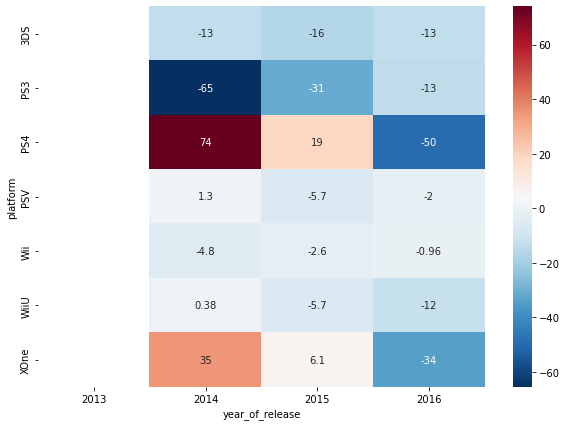

In [60]:
plt.figure(figsize=(10,7))
sns.heatmap(dynamics, cmap='RdBu_r', annot = True)
plt.show()

We have left 7 platform. Stoping to be on top = 3DS, DC, PC, WiiU, Wii, PS3. 
Potentially profitable = PS4, Xone, PSV.

### Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

In [61]:
grouped=df_new.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
grouped

,platform,year_of_release,total_sales
0,3DS,2013,56.57
1,3DS,2014,43.76
2,3DS,2015,27.78
3,3DS,2016,15.14
4,PC,2013,12.38
5,PC,2014,13.28
6,PC,2015,8.52
7,PC,2016,5.25
8,PS3,2013,113.25
9,PS3,2014,47.76


In [62]:
df_plt.columns

Index(['3DS', 'PS3', 'PS4', 'PSV', 'Wii', 'WiiU', 'XOne'], dtype='object', name='platform')

In [63]:
df_plt.reset_index()

platform,year_of_release,3DS,PS3,PS4,PSV,Wii,WiiU,XOne
0,2013,56.57,113.25,25.99,10.59,8.59,21.65,18.96
1,2014,43.76,47.76,100.00,11.90,3.75,22.03,54.07
2,2015,27.78,16.82,118.90,6.25,1.14,16.35,60.14
3,2016,15.14,3.60,69.25,4.25,0.18,4.60,26.15


In [64]:
df_plt.columns

Index(['3DS', 'PS3', 'PS4', 'PSV', 'Wii', 'WiiU', 'XOne'], dtype='object', name='platform')

In [65]:
order = ['Wii', 'PSV', 'WiiU', '3DS', 'XOne', 'PS3', 'PS4']

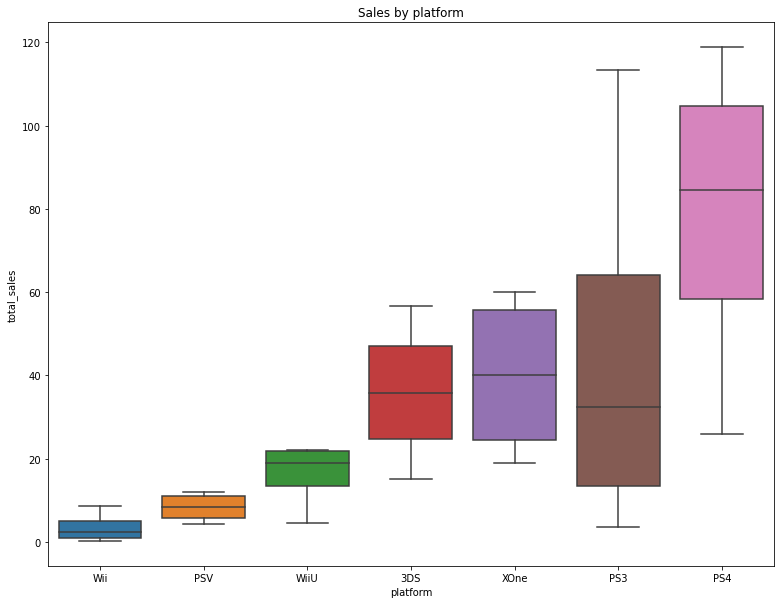

In [66]:
plt.figure(figsize=(13,10))
sns.boxplot(x='platform',y='total_sales',data=grouped, order=order)
plt.title('Sales by platform')
plt.show()

We have a huge difference in sales between platforms, same goes for  average sales on various platforms. For popular platforms sale per year is higher than for others per all life cycle. Also, for example, sales for portable platforms incomparably low relatively 'standard' platforms.

#### Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.



- scatter plot
- calculate the correlation - reviews and sales
- conclusions

In [67]:
grouped2=df_new.groupby(['platform','name'])['total_sales'].sum().reset_index()

In [68]:
df_XO =grouped2.query('platform == "XOne" and total_sales <=1.3')


In [69]:
df_XO

,platform,name,total_sales
1911,XOne,7 Days to Die,0.05
1912,XOne,Adventure Time: Finn & Jake Investigations,0.05
1913,XOne,Agatha Christie's The ABC Murders,0.01
1914,XOne,Alien: Isolation,0.50
1915,XOne,Angry Birds Star Wars,0.17
...,...,...,...
2153,XOne,XCOM 2,0.04
2154,XOne,ZombiU,0.01
2155,XOne,Zombie Army Trilogy,0.11
2156,XOne,Zoo Tycoon (2013),0.36


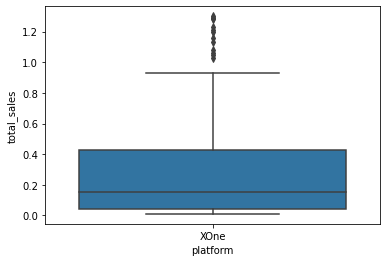

In [70]:
sns.boxplot(x='platform',y='total_sales', data=df_XO)
plt.show()

In [71]:
grouped2

,platform,name,total_sales
0,3DS,Beyblade Burst,0.03
1,3DS,Fire Emblem Fates,1.67
2,3DS,Frozen: Olaf's Quest,0.59
3,3DS,Haikyu!! Cross Team Match!,0.04
4,3DS,12-Sai. Honto no Kimochi,0.07
...,...,...,...
2153,XOne,XCOM 2,0.04
2154,XOne,ZombiU,0.01
2155,XOne,Zombie Army Trilogy,0.11
2156,XOne,Zoo Tycoon (2013),0.36


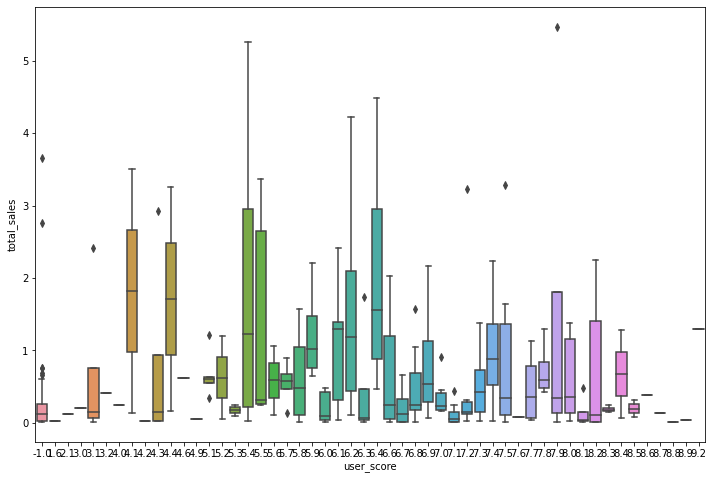

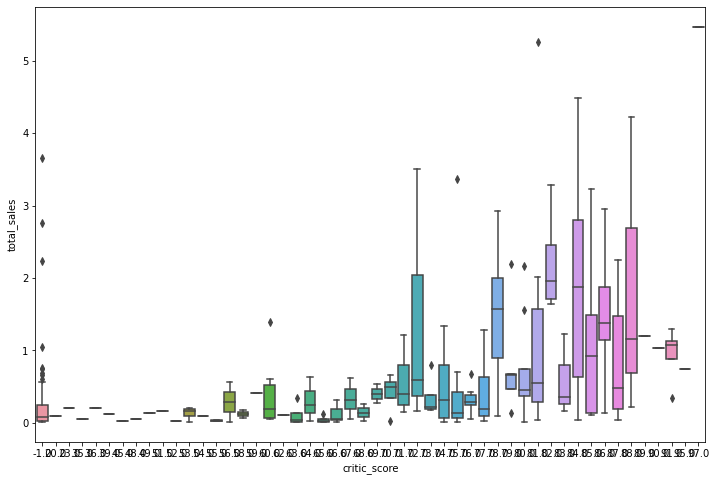

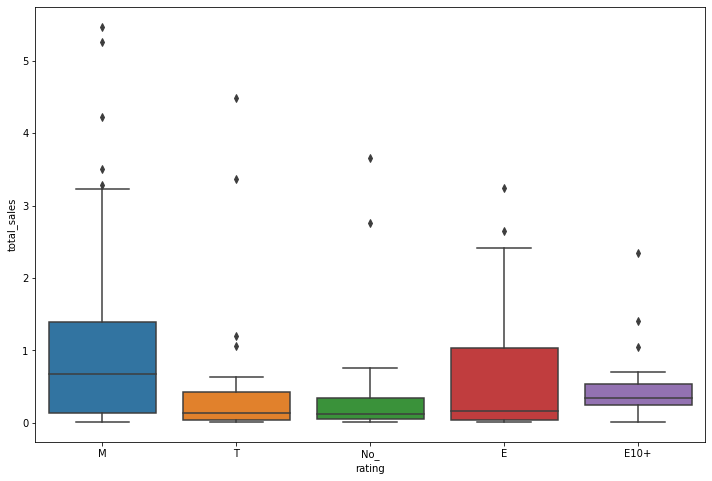

In [72]:
df_XO_2 =df.query('platform == "XOne" and total_sales <=5.5')
plt.figure(figsize=(12,8))
sns.boxplot(x='user_score',y='total_sales', data=df_XO_2)
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x='critic_score',y='total_sales', data=df_XO_2)
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x='rating',y='total_sales', data=df_XO_2)
plt.show()

In [73]:
df_XO_3 = df.query('platform == "XOne"')

In [74]:
df_XO_3US = df_XO_2.query('user_score > 0')

In [75]:
df_XO_3CS = df_XO_2.query('critic_score > 1')

In [76]:
df_XO_3R = df_XO_2.query('rating != "No_"')

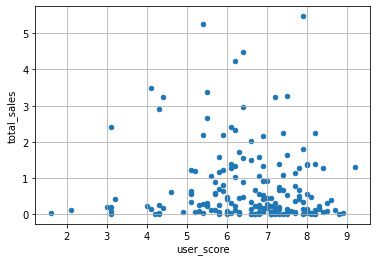

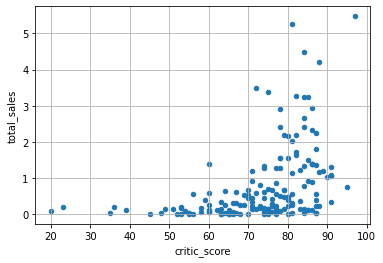

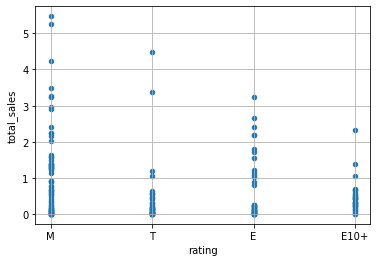

In [77]:
df_XO_3US.plot(x='user_score', y='total_sales', kind='scatter', grid=True)
df_XO_3CS.plot(x='critic_score', y='total_sales', kind='scatter', grid=True)
df_XO_3R.plot(x='rating', y='total_sales', kind='scatter', grid=True)
plt.show()

In [78]:
df_XO_2.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.269875,-0.207833,-0.128134,-0.269996,-0.008305,-0.004653,-0.264498
na_sales,-0.269875,1.000000,0.730995,0.422721,0.985490,0.329773,0.178645,0.964137
eu_sales,-0.207833,0.730995,1.000000,0.411136,0.833520,0.306804,0.152677,0.885844
jp_sales,-0.128134,0.422721,0.411136,1.000000,0.439971,0.160485,0.100405,0.451488
other_sales,-0.269996,0.985490,0.833520,0.439971,1.000000,0.339778,0.178805,0.994251
critic_score,-0.008305,0.329773,0.306804,0.160485,0.339778,1.000000,0.779096,0.343439
user_score,-0.004653,0.178645,0.152677,0.100405,0.178805,0.779096,1.000000,0.180700
total_sales,-0.264498,0.964137,0.885844,0.451488,0.994251,0.343439,0.180700,1.000000


There is a correlation only between total sales (or any sales separately) and critic score. No correlation between sales and user score.
Also there is difference in sales of the games with different rating.

#### Keeping your conclusions in mind, compare the sales of the same games on other platforms.

In [79]:
grouped3=df_new.groupby(['platform','name'])['total_sales'].sum().reset_index()
df_PS2 =grouped3.query('platform == "PS2"') #and total_sales <=5.3'
df_PS2

,platform,name,total_sales


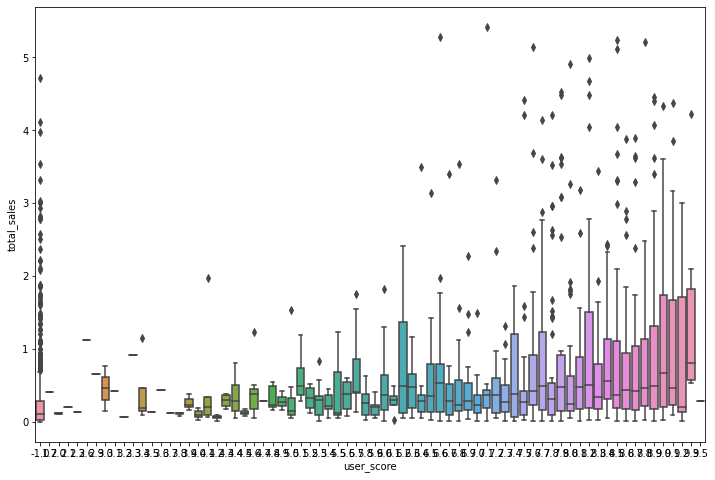

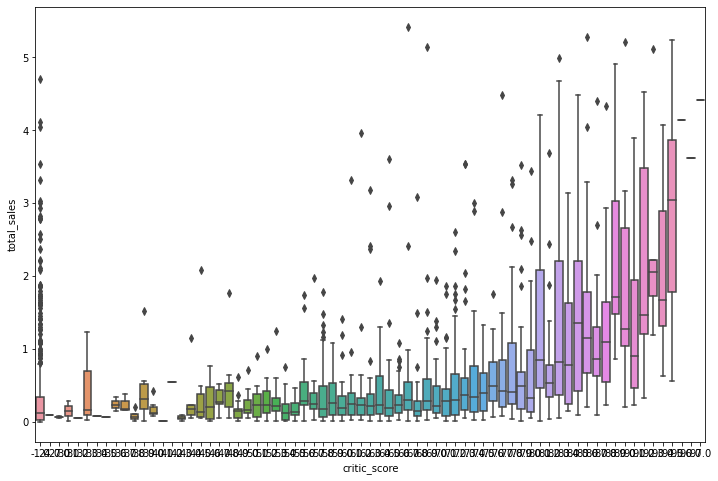

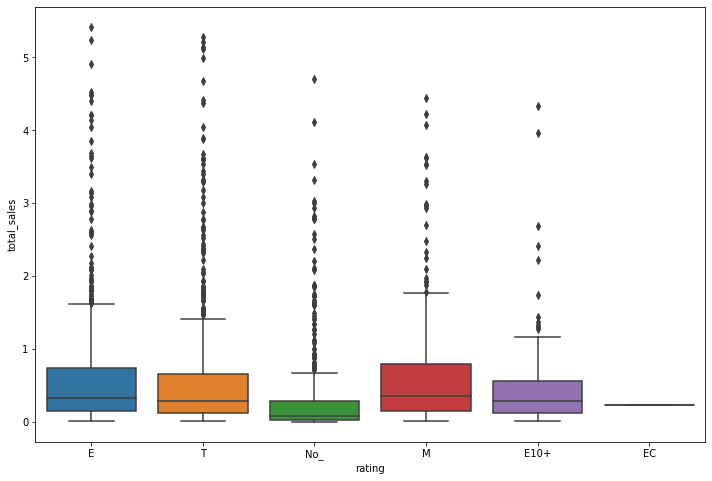

In [80]:

df_PS2 =df.query('platform == "PS2" and total_sales <=5.5')
plt.figure(figsize=(12,8))
sns.boxplot(x='user_score',y='total_sales', data=df_PS2)
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x='critic_score',y='total_sales', data=df_PS2)
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x='rating',y='total_sales', data=df_PS2)
plt.show()

In [81]:
df_PS_3 =df.query('platform == "PS2"')

In [82]:
df_PS_3US = df_PS_3.query('user_score > 0')

In [83]:
df_PS_3CS = df_PS_3.query('critic_score > 0')

In [84]:
df_PS_3R = df_PS_3.query('rating != "No_"')

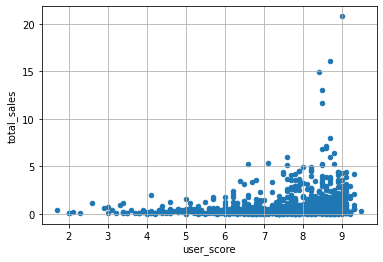

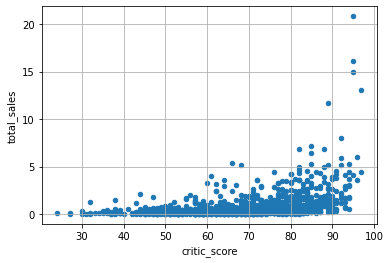

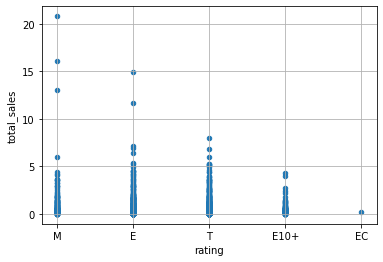

In [85]:
df_PS_3US.plot(x='user_score', y='total_sales', kind='scatter', grid=True)
df_PS_3CS.plot(x='critic_score', y='total_sales', kind='scatter', grid=True)
df_PS_3R.plot(x='rating', y='total_sales', kind='scatter', grid=True)
plt.show()

In [86]:
df_PS_3.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.012678,-0.015672,0.008861,0.000887,-0.024658,-0.015285,-0.009631
na_sales,-0.012678,1.000000,0.654672,0.197182,0.566580,0.334591,0.288689,0.920762
eu_sales,-0.015672,0.654672,1.000000,0.224017,0.307067,0.251345,0.214886,0.781918
jp_sales,0.008861,0.197182,0.224017,1.000000,0.175200,0.025237,0.018985,0.398318
other_sales,0.000887,0.566580,0.307067,0.175200,1.000000,0.150327,0.136511,0.714651
critic_score,-0.024658,0.334591,0.251345,0.025237,0.150327,1.000000,0.807302,0.299548
user_score,-0.015285,0.288689,0.214886,0.018985,0.136511,0.807302,1.000000,0.259366
total_sales,-0.009631,0.920762,0.781918,0.398318,0.714651,0.299548,0.259366,1.000000


Conclusion from XOne question is not working for PS2. Here we have positive correlation of total_sales not only with critic_score but with user_score also.

#### Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

- general distribution of games by genre
- choose most profitable genres
- generalize about genres with high and low sales

In [87]:
df_genre_0=df.groupby(['genre']).sum().sort_values(by='genre').reset_index()
df_genre_0.sort_values(by='total_sales')

,genre,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
11,Strategy,1349771,68.55,45.17,49.66,10.85,21389.0,1896.8,174.23
1,Adventure,2596675,105.26,63.54,52.30,16.49,20122.0,1136.9,237.59
5,Puzzle,1140965,122.87,50.01,57.31,12.38,14747.0,466.4,242.57
9,Simulation,1719681,181.92,113.52,63.80,30.73,23633.0,1925.3,389.97
2,Fighting,1677883,223.36,100.33,87.48,36.36,27870.0,2463.7,447.53
6,Racing,2457941,359.35,236.51,56.71,76.10,49922.0,3902.2,728.67
3,Misc,3454583,407.27,212.74,108.11,74.39,33615.0,1682.7,802.51
4,Platform,1759377,445.50,200.35,130.83,51.09,33434.0,2665.0,827.77
7,Role-Playing,2972524,330.81,188.71,355.41,59.63,52784.0,4906.3,934.56
8,Shooter,2599792,592.24,317.34,38.76,104.11,65872.0,6107.7,1052.45


In [88]:
df_genre=df[['genre','total_sales']].groupby(['genre']).count().sort_values(by='total_sales', ascending=False).reset_index()

In [89]:
df_genre

,genre,total_sales
0,Action,3369
1,Sports,2348
2,Misc,1750
3,Role-Playing,1498
4,Shooter,1323
5,Adventure,1303
6,Racing,1249
7,Platform,888
8,Simulation,873
9,Fighting,849


In [90]:
df_genre_02=df.groupby(['genre']).count().sort_values(by='platform', ascending=False).reset_index()
df_genre_02

,genre,name,platform,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Action,3369,3369,3369,3369,3369,3369,3369,3369,3369,3369,3369
1,Sports,2348,2348,2348,2348,2348,2348,2348,2348,2348,2348,2348
2,Misc,1750,1750,1750,1750,1750,1750,1750,1750,1750,1750,1750
3,Role-Playing,1498,1498,1498,1498,1498,1498,1498,1498,1498,1498,1498
4,Shooter,1323,1323,1323,1323,1323,1323,1323,1323,1323,1323,1323
5,Adventure,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303
6,Racing,1249,1249,1249,1249,1249,1249,1249,1249,1249,1249,1249
7,Platform,888,888,888,888,888,888,888,888,888,888,888
8,Simulation,873,873,873,873,873,873,873,873,873,873,873
9,Fighting,849,849,849,849,849,849,849,849,849,849,849


Action takes the first place by total_sales and by number of games

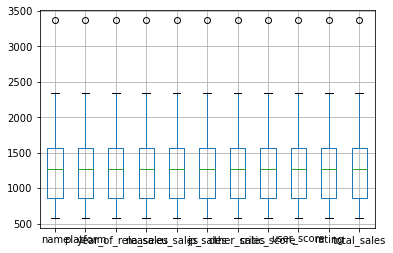

In [91]:
df_genre_02.boxplot()
plt.show()

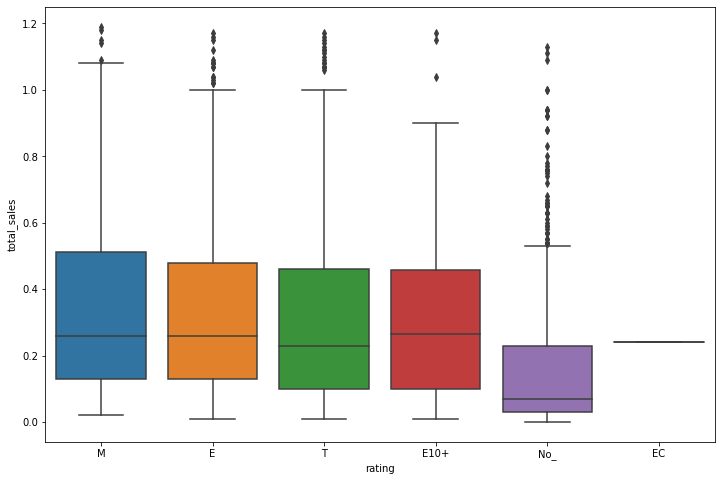

In [92]:
plt.figure(figsize=(12,8))
sns.boxplot(x='rating',y='total_sales', data=df_PS2.query('total_sales < 1.2'))
plt.show()

## Step 4. Create a user profile for each region

For each region (NA, EU, JP), determine:
- The top five platforms. Describe variations in their market shares from region to region.
- The top five genres. Explain the difference.
- Do ESRB ratings affect sales in individual regions?


In [93]:
df_4 = df.sort_values(by='total_sales', ascending=False)

In [94]:
df_4.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,No_,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,No_,31.38


In [95]:
df_new.groupby(['platform']).sum().sort_values(by='total_sales', ascending=False)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
platform,,,,,,,,
PS4,789937,108.74,141.09,15.96,48.35,18027.0,1599.3,314.14
PS3,694853,63.50,67.81,23.35,26.77,8270.0,1021.8,181.43
XOne,497693,93.12,51.59,0.34,14.27,12314.0,1121.9,159.32
3DS,610329,38.20,30.96,67.81,6.28,4620.0,335.1,143.25
X360,374590,81.66,42.52,0.51,12.11,5503.0,814.0,136.80
WiiU,231624,29.21,19.85,10.88,4.69,4970.0,526.4,64.63
PC,380766,11.11,25.36,0.00,2.96,11217.0,937.8,39.43
PSV,721229,5.04,6.10,18.59,3.26,5235.0,486.2,32.99
Wii,46316,6.56,5.93,0.05,1.12,-23.0,20.8,13.66


### For each region (NA, EU, JP), determine: The top five platforms. Describe variations in their market shares from region to region.

In [96]:
na_p = df.groupby(['platform'])['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).head()
na_p['share'] = na_p['na_sales'] / na_p['na_sales'].sum()
na_p

,platform,na_sales,share
28,X360,602.47,0.244996
16,PS2,583.84,0.237420
26,Wii,496.90,0.202066
17,PS3,393.49,0.160014
4,DS,382.40,0.155504


<ipython-input-97-ddbceaabbdba>:4: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(y, labels = mylabels, autopct='%1.1f%%',)


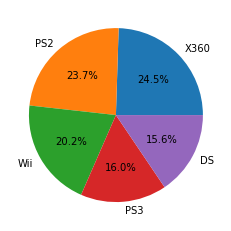

In [97]:
y = na_p['share'] 
mylabels = na_p['platform']

plt.pie(y, labels = mylabels, autopct='%1.1f%%',)
plt.show() 

In [98]:
eu_p = df.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).head()
eu_p

,platform,eu_sales
16,PS2,339.29
17,PS3,330.29
28,X360,270.76
26,Wii,262.21
15,PS,213.61


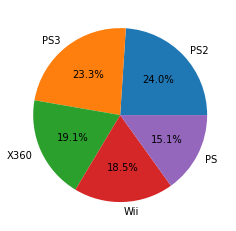

In [99]:
y = eu_p['eu_sales']  
mylabels = eu_p['platform']

plt.pie(y, labels = mylabels, autopct='%1.1f%%',)
plt.show() 

In [100]:
jp_p = df.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head()
jp_p

,platform,jp_sales
4,DS,175.57
15,PS,139.82
16,PS2,139.20
23,SNES,116.55
2,3DS,100.67


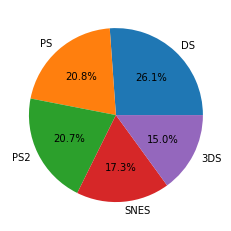

In [101]:
y =jp_p['jp_sales']  
mylabels = jp_p['platform']

plt.pie(y, labels = mylabels, autopct='%1.1f%%',)
plt.show() 

Conclusion: North America is the most profitable market. Top 5 platforms in North America market is X360, PS2, Wii, PS3 and DS. EU and NA region has similar structure of the top five platforms, but in EU market Play station is more popular - PS2 and PS3 takes two first places and PS takes 5th. The most popular platform on JP market is DS, then goes PS and PS2, XBox not represented at all.

### The top five genres. Explain the difference.


In [102]:
na_g = df.groupby(['genre'])['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).head()
na_g

,genre,na_sales
0,Action,879.01
10,Sports,684.43
8,Shooter,592.24
4,Platform,445.50
3,Misc,407.27


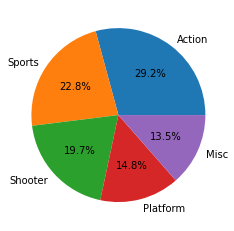

In [103]:
y =na_g['na_sales']  
mylabels = na_g['genre']

plt.pie(y, labels = mylabels, autopct='%1.1f%%',)
plt.show() 

In [104]:
eu_g = df.groupby(['genre'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).head()
eu_g

,genre,eu_sales
0,Action,519.13
10,Sports,376.79
8,Shooter,317.34
6,Racing,236.51
3,Misc,212.74


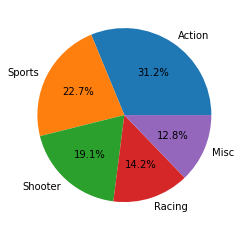

In [105]:
y =eu_g['eu_sales']  
mylabels = eu_g['genre']

plt.pie(y, labels = mylabels, autopct='%1.1f%%',)
plt.show() 

In [106]:
jp_g = df.groupby(['genre'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head()
jp_g

,genre,jp_sales
7,Role-Playing,355.41
0,Action,161.43
10,Sports,135.54
4,Platform,130.83
3,Misc,108.11


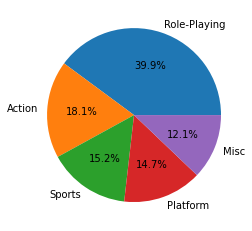

In [107]:
y =jp_g['jp_sales']  
mylabels = jp_g['genre']

plt.pie(y, labels = mylabels, autopct='%1.1f%%',)
plt.show() 

Conclusion: 

'Action' genre takes the first place in NA and EU regions(29% and 31% respectively). Then for both regions goes 'Sports', 'Shooter' and 'Misc' on the 5th position. 4th place are the only different position - 'Platform' for NA and 'Racing' for EU. 'Role-Playing' takes 1st in Japan with the highest share between all - almost 40%. Next four positions with shares 18-12% are equal to NA region, except of 'Shooter'.

### Do ESRB ratings affect sales in individual regions?

In [108]:
na=df.groupby(['rating'])['na_sales'].mean().reset_index().sort_values(by='na_sales',ascending=False).head()
na

,rating,na_sales
0,AO,1.260000
4,K-A,0.853333
5,M,0.478874
1,E,0.324058
8,T,0.256586


In [109]:
eu=df.groupby(['rating'])['eu_sales'].mean().reset_index().sort_values(by='eu_sales',ascending=False).head()
eu

,rating,eu_sales
0,AO,0.610000
5,M,0.309642
1,E,0.178008
8,T,0.144218
2,E10+,0.132761


In [110]:
jp=df.groupby(['rating'])['jp_sales'].mean().reset_index().sort_values(by='jp_sales',ascending=False).head()
jp

,rating,jp_sales
4,K-A,0.486667
6,No_,0.124472
8,T,0.051131
1,E,0.049652
5,M,0.041100


In [111]:
other=df.groupby(['rating'])['other_sales'].mean().reset_index().sort_values(by='other_sales',ascending=False).head()
other

,rating,other_sales
5,M,0.113308
0,AO,0.090000
1,E,0.058689
8,T,0.052405
2,E10+,0.051803


Conclusion: ESRB ratings affect sales in individual regions. AO (Adults Only) takes first place in NA and EU sales. K-A (Kids to Adults) was replaced in 1998 by the E (Everyone) rating, so numbers probably can be summed here for 2nd and 4th places in NA sales. M (Mature) have content that may be suitable for persons ages 17 and older taked 2nd place is EU sales and 3rd in NA. In Japan K-A (Kids to Adults) is the most popular rating, then goes 'No_' (replaced missed values). Looks like here the most popular games are made before 1998 (name of the rating group was changed) and 1994 (rating itself was established) respectively.

## Step 5. Test the following hypotheses:

Average user ratings of the Xbox One and PC platforms are the same.

Average user ratings for the Action and Sports genres are different.

Set the alpha threshold value yourself.
Explain:
 - How you formulated the null and alternative hypotheses
 - What significance level you chose to test the hypotheses, and why


### Test the following hypothes: Average user ratings of the Xbox One and PC platforms are the same.

H0: Average user ratings of the Xbox One and PC platforms are equal

H1: Average user ratings of the Xbox One and PC platforms are not equal

sample1 = Xbox One

sample2 = PC

alpha = 0.5
median of 'user_score'

Hypothesis on the equality of two population to compare the means of two different statistical populations. Alpha: 0.5 (try with standard, as changing it in reasonable way don't change anything). To get more accurate results we set equal_var to False as the variances of the statistical populations from which the samples are taken are not equal.

In [112]:
sample1=df.query('platform == "XOne" and user_score > 0')

In [113]:
x = sample1['user_score']
variance = np.var(x) 
print(variance)

1.8965188383045533


In [114]:
sample1['user_score'].median()

6.8

In [115]:
XOne_av = sample1['user_score']

In [116]:
sample2=df.query('platform == "PS" and user_score > 0')

In [117]:
x = sample2['user_score']
variance = np.var(x) 
print(variance)

1.7631260478585569


In [118]:
sample1['user_score'].median()

6.8

In [119]:
PS_av = sample1['user_score']

In [120]:
#p_value = p_value.astype(int)
alpha = 0.5 # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis
results = st.ttest_ind(XOne_av, PS_av, equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  1.0
We can't reject the null hypothesis


We can't reject the null hypothesis - average of sample1 is  equal to average of sample2. Average user ratings of the Xbox One and PC platforms are the same.

### Test the following hypothes:  Average user ratings for the Action and Sports genres are different.

H0: Average user ratings for the Action and Sports genres are equal 

H1: Average user ratings for the Action and Sports genres are different

sample1 = Action 

sample2 = Sports 

alpha = 0.5 

median of 'user_score'

Hypothesis on the equality of two population to compare the means of two different statistical populations. Alpha: 0.5 (try with standard) To get more accurate results we set equal_var to False as the variances of the statistical populations from which the samples are taken are not equal.

In [121]:
sample1=df.query('genre == "Action" and user_score > 0')

In [122]:
x = sample1['user_score']
variance = np.var(x) 
print(variance)

2.030636653826616


In [123]:
sample1['user_score'].median()

7.4

In [124]:
Action_av = sample1['user_score']

In [125]:
sample2=df.query('genre == "Sports" and user_score > 0')

In [126]:
x = sample2['user_score']
variance = np.var(x) 
print(variance)

2.5941606711770206


In [127]:
sample2.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77


In [128]:
sample2['user_score'].median()

7.4

In [129]:
Sports_av = sample1['user_score']

In [130]:
#p_value = p_value.astype(int)
alpha = 0.05 # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis
results = st.ttest_ind(Action_av, Sports_av, equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  1.0
We can't reject the null hypothesis


Our hypothesis in question is wrong. We can't reject the null hypothesis. Average user ratings of the Action genre and Sports genre are the same.

##  General conclusion


Data consists of historical data on game sales divided by region - NA, EU, JP, and others. Data consists of 11 columns and 16715 rows. 6 columns have missing values.  Data are available from 1980 to 2016. Column 'year_of_release' - missing values filled with median year per platform. Data type converted to int. There are no duplicates - the same name = same game but on a different platform and/or different year. Two missing values in column 'name' are not possible to identify, as half of the other columns are also empty, they were removed. We have a lot of missing values in Ratings - critic_score, user_score, rating. Most of the positions also have empty fields in users' and experts' scores. Plus low number or 0.0 in sales fields. Probably, ratings for games with low sales values weren't defined. Additionally, the early years had no ratings. Missing rows in score columns filled with medians. In 'user_score', 'tbd' also replaced with 'nan' to replace them both with median, as for project seems no difference between empty field or 'to be determine', and converted to float. 'NaN' in Rating replaced with 'No_' = 'not rated' to fill empty rows.

The number of games released per year was growing up to 2009, slowly decreasing in 2010-2011. In 2012 was released almost twice less in the previous year. The later number stayed stable around 550-650 games per year. Data for the period before 1993 is not significant, less than 50 games per year.

Platforms "DS", "Wii", "PS3", "X360", "PS2" have the greatest total sales. The distribution shows that "Wii" used to have the highest sales - 223.3 in 2009, but now have almost zero sales - 0.18. According to the data, the life cycle of the platform is usually around 11-12 years, with peak "seasons" around 5 years. Good years can start in the beginning or in the middle. But not in the last 4 years, which is time for old ones to fade. According to the info from previous point, to make a prognosis for 2017, we should take data for the platforms which could be profitable in 2017. So as the peak season of the platform is 5 years, we can take last 4 to see if the sales a growing or decreasing. The prognosis for 2017 should be based on those platforms, which have chances to be profitable after 2016. According to the results of the previous analysis, to build a prognosis we should take data not earlier than from 2013. We have left 7 platform. Stoping to be on top = 3DS, DC, PC, WiiU, Wii, PS3. Potentially profitable = PS4, Xone, PSV. We have a huge difference in sales between platforms, same goes for average sales on various platforms. For popular platforms sale per year is higher than for others per all life cycle. Also, for example, sales for portable platforms incomparably low relatively 'standard' platforms.

'XOne' platform was chosen to take a look at how user and professional reviews affect sales for one popular platform. Scatter plots and calculations of the correlation between reviews and sales showed that there is a correlation only between total sales (or any sales separately) and critic score. No correlation between sales and user scores. Also, there is a difference in sales of the games with a different ratings. At the same time, the conclusion made for 'XOne' is not working for 'PS2'. Here we have a positive correlation of total_sales not only with critic_score but with user_score also.
If take a look at the general distribution of games by genre, 'Action' takes first place by total_sales and by the number of games. The most profitable genres are Action, Sports, Shooter, Role-Playing, and Platform. The most popular by a number of games - Action with 3369 games, Sports, Misc, Role-Playing and Shooter.

North America is the most profitable market. The top 5 platforms in the North American market are X360, PS2, Wii, PS3, and DS. EU and NA region has a similar structure of the top five platforms, but in the EU market Play station is more popular - PS2 and PS3 take two first places and PS takes 5th. The most popular platform on the JP market is DS, then goes PS and PS2, Xbox not represented at all. 

'Action' genre takes the first place in NA and EU regions(29% and 31% respectively). Then for both regions goes 'Sports', 'Shooter' and 'Misc' on the 5th position. 4th place are the only different position - 'Platform' for NA and 'Racing' for EU. 'Role-Playing' takes 1st in Japan with the highest share between all - almost 40%. Next four positions with shares 18-12% are equal to NA region, except of 'Shooter'.

ESRB ratings affect sales in individual regions. AO (Adults Only) takes first place in NA and EU sales. K-A (Kids to Adults) was replaced in 1998 by the E (Everyone) rating, so numbers probably can be summed here for 2nd and 4th places in NA sales. M (Mature) has content that may be suitable for people ages 17 and older taken 2nd place in EU sales and 3rd in NA. In Japan K-A (Kids to Adults) is the most popular rating, then goes 'No_' (replaced missed values). Looks like here the most popular games are made before 1998 (name of the rating group was changed) and 1994 (rating itself was established) respectively.

As the last part, the following hypotheses were tested:
—Average user ratings of the Xbox One and PC platforms are the same.
—Average user ratings for the Action and Sports genres are different.

For the first point, two hypotheses were formulated - H0: Average user ratings of the Xbox One and PC platforms are equal,H1: Average user ratings of the Xbox One and PC platforms are not equal. Hypothesis on the equality of two populations to compare the means of two different statistical populations. 'Equal_var' parameter was set to False as the variances of the statistical populations from which the samples are taken are not equal. We can't reject the null hypothesis - the average of sample1 is equal to the average of sample2. Average user ratings of the Xbox One and PC platforms are the same. 

Hypotheses for the second point - H0: Average user ratings for the Action and Sports genres are equal, H1: Average user ratings for the Action and Sports genres are different. Our hypothesis in question is wrong. We can't reject the null hypothesis. Average user ratings of the Action genre and Sports genre are the same.